<center>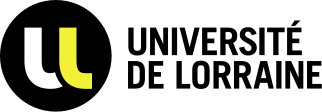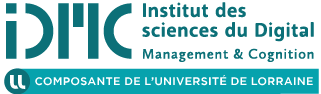</center>

<h1><center><strong><font color="Teal">Data Mining for Natural Language Processing<br/> Master 2 Natural Language Processing <br/> <font color="red">Exam on Data Exploration</font></font></strong></center></h1>

<center>
<h3><a href="https://gguibon.github.io/">Gaël Guibon</a></h3>
<email>gael.guibon@univ-lorraine.fr</email>
<br/>
Year 2022-2023
</center>

<h3><center><font color="green"><strong>Correction 💯</strong></font></center></h3>

<center>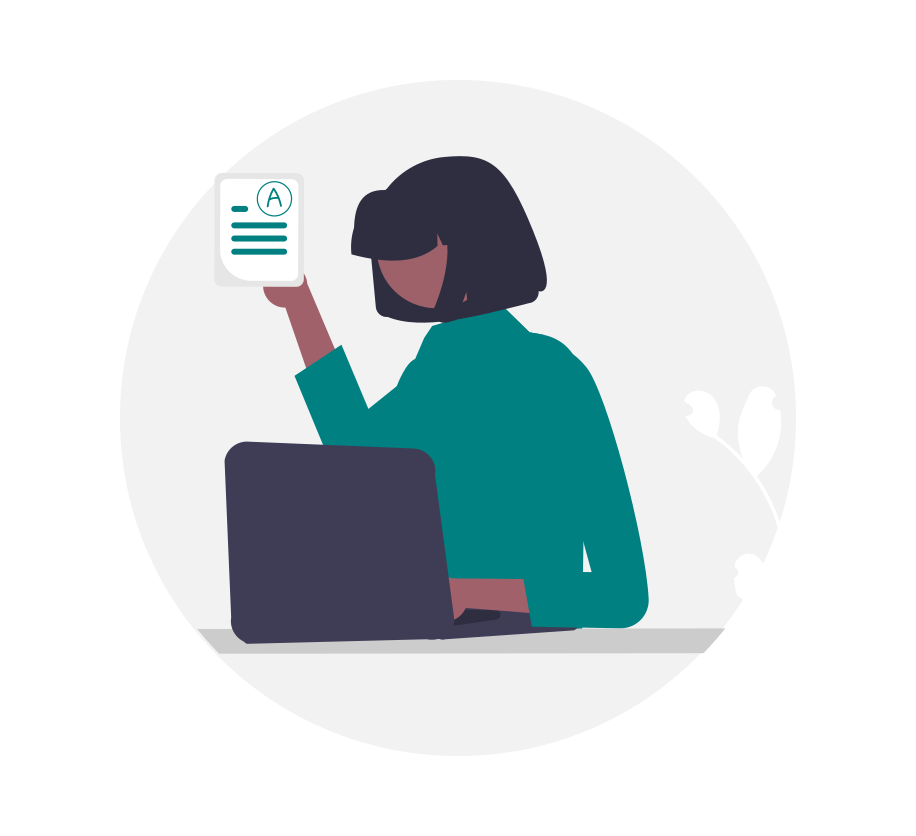</center>

------------------------

# <font color="teal">**Usage (a.k.a. README)**</font>

This is a python notebook that we will use for the lab today. It is hosted by Google Colab to make it easy to share. You should be able to edit it, but your edits won't be saved, so I don't recommend it.


In order to work with it and answer the questions, you can either use it in Google Colab, download it and use it in VSCode (or other IDE) or Jupyter Notebook.

**Usage in Google Colab.** If you own a Google account, you can upload a copy of this file and edit it with saves. To do so got to "File" > "Save a copy in Drive". Don't forget to use the interactive Table of Content on the left panel.

**Local Usage.** You can download it either as a jupyter notebook (.ipynb) or as a python programme (.py) using the File>Download menu (Fichier>Télécharger in French). We recommend that you download it as a Jupyter Notebook to work on and edit on your own laptop.



## <font color="teal">"Quality of Life" Tips</font>

- To better understand when you need to do something, please for the 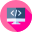 **TODO!** marks sprinkled across the lab!

- Run the small pieces of code (named Code Cells) below to see what they do (in Jupyter Notebook or Google Colab, press the small \"play\" button on the left, or press ctrl+enter in the code box)
- On Google Colab and VSCode, you can fold and unfold section and subsections to better display the notebook. Try to click on the arrow of this '"Quality of Life" Tips' section as below:
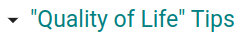

## <font color="teal">Install local python environnement</font>
At home you may want to use Python locally. Here are the steps:
1. Download the latest Python (Python3 not 2) from here: [https://www.python.org/downloads/](https://www.python.org/downloads/)
2. Install it (if you are using Ubuntu 16.04 you already have Python installed)

Start using it:
- Open terminal(unix/mac) or CommandLine(windows), type `python` to start an interactive python environnement
- Create a file named `my_super_program.py` and type `print('hello')` inside. Execute this file by typing `python3 my_super_program.py`.

To code you may need an IDE for smoother coding. I would suggest [Visual Studio Code](https://code.visualstudio.com/Download).

# <font color="teal">**Context & Rules**</font>

------------------------

Let's say you arrived in a new team and need to handle new data from a language you don't know anything about.

In this exam, you will need to apply some parts of what we saw during the course to explore this data. To make it feasible in the given time, some preprocessing parts are already done.

### **Old French Dataset**
The data is an dataset of Old French texts. Even French speakers do not understand the content. Thus, you need to dwelve into some shallow data mining approaches ot explore it. Also, the data is tiny, which is perfect for this exam.

### **Rules**
For this exam, the rules are as follow:
- you cannot communicate in any way (it will yield a grade of 0 / 20)
- you can use all the course materials
- you can have access to internet to access documentation for instance
- the jupyter notebook can be used either locally or through Google Colab. It is up to you.

### **How to return your files**
Upon finishing the exam, upload your file(s) in the dedicated section "exam".

Good luck!

# <font color="teal">**Preparation**</font>

### Download the dataset
(can also be manually downloaded here: https://gitlab.com/gguibon/idmc-storage/)

In [ ]:
# Download the dataset (can also be manually downloaded here: https://gitlab.com/gguibon/idmc-storage)
! wget https://gitlab.com/gguibon/idmc-storage/-/raw/main/srcmf.tsv

--2023-01-16 06:51:55--  https://gitlab.com/gguibon/idmc-storage/-/raw/main/srcmf.tsv
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 907620 (886K) [text/plain]
Saving to: ‘srcmf.tsv.1’

srcmf.tsv.1         100%[===================>] 886.35K  --.-KB/s    in 0.06s   

2023-01-16 06:51:56 (15.0 MB/s) - ‘srcmf.tsv.1’ saved [907620/907620]



___
# <strong><font color="teal">Explore the Dataset: simple stats</font></strong>

Open the dataset. It is a Tabulation Separated Values (TSV). You can open it in anyway you want.

In [ ]:
import pandas as pd
df = pd.read_csv('./srcmf.tsv', sep="\t", index_col=0)
print("Shape:  {0}".format(df.shape))
df.head()

Shape:  (9, 4)


,title,filename,form,text
0,Vie Saint Légier,StLegier,verse,Dominedeu devemps lauder et a sus sancz honor ...
1,Vie de Saint Alexis,StAlexis,verse,Bons fut li secles al tens ancïenur\nquer feit...
2,Chanson de Roland,Roland,verse,"Carles li reis , nostre emperere magnes , Set ..."
3,Lapidaire en prose,Lapidaire,prose,"Hom trovet lisant que Evax , li reis de Arabie..."
4,"Yvain, Chretien de Troyes",TroyesYvain,verse,"Artus li boens rois de Bretaingne , La cui pro..."


In [ ]:
df.columns

Index(['title', 'filename', 'form', 'text'], dtype='object')

#### 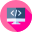 **TODO:** Print the mean sentence length for each form (verse, prose) and for each text

The `text` column is already a tokenized text.

A prose is a text written or spoken language in its ordinary form, without metrical structure.

A verse is a writing arranged with a metrical rhythm, typically having a rhyme. (Poems for instance)

In [ ]:
# numpy is recommended but not mandatory
import numpy as np

In [ ]:
def getMeanSentLength(text):
  sentences = text.split("\n")
  return np.array([len(sent.split(" ")) for sent in sentences]).mean()

df["sentlength"] = df["text"].apply(getMeanSentLength)
verse_mean_length = np.array(df[ df['form'] == "verse" ]["sentlength"].tolist()).mean()
prose_mean_length = np.array(df[ df['form'] == "prose" ]["sentlength"].tolist()).mean()
print(f"verse has {verse_mean_length} tokens per sentence while prose has {prose_mean_length}")

verse has 9.952754518283196 tokens per sentence while prose has 11.601438762347641


#### 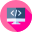 **TODO:** Plot the Zipf law for Each Text

The Zipf plot should be based on the tokens.

In [ ]:
from functools import reduce
from operator import add

df["tokens"] = df.text.drop_duplicates().apply(lambda x: [t for s in x.split('\n') for t in s.split(' ')] ).array
df

,title,filename,form,text,sentlength,tokens
0,Vie Saint Légier,StLegier,verse,Dominedeu devemps lauder et a sus sancz honor ...,8.809524,"[Dominedeu, devemps, lauder, et, a, sus, sancz..."
1,Vie de Saint Alexis,StAlexis,verse,Bons fut li secles al tens ancïenur\nquer feit...,9.797872,"[Bons, fut, li, secles, al, tens, ancïenur, qu..."
2,Chanson de Roland,Roland,verse,"Carles li reis , nostre emperere magnes , Set ...",8.946787,"[Carles, li, reis, ,, nostre, emperere, magnes..."
3,Lapidaire en prose,Lapidaire,prose,"Hom trovet lisant que Evax , li reis de Arabie...",10.484733,"[Hom, trovet, lisant, que, Evax, ,, li, reis, ..."
4,"Yvain, Chretien de Troyes",TroyesYvain,verse,"Artus li boens rois de Bretaingne , La cui pro...",12.361856,"[Artus, li, boens, rois, de, Bretaingne, ,, La..."
5,Queste del Saint Graal,Graal,prose,et mes sires Gauvains lor demande coment il l'...,14.359345,"[et, mes, sires, Gauvains, lor, demande, comen..."
6,Aucassin et Nicolete,Aucassin,"verse, prose",C' EST D' AUCASIN ET DE NICOLETE\nQui vauroit ...,11.212909,"[C', EST, D', AUCASIN, ET, DE, NICOLETE, Qui, ..."
7,Tristan et Yseut,BeroulTristan,verse,"Com ele aprisme son ami , Oiez com el l' a dev...",9.847734,"[Com, ele, aprisme, son, ami, ,, Oiez, com, el..."
8,Li quatre livres des reis,QuatreLivresReis,prose,Li primiers livres des Reis .\nUns bérs fu ja ...,9.960239,"[Li, primiers, livres, des, Reis, ., Uns, bérs..."


Counter({',': 126, '.': 94, ';': 36, 'a': 31, 'et': 30, 'en': 29, 'lo': 25, 'li': 24, 'fud': 24, 'de': 19, 'si': 18, 'il': 18, 'que': 18, 'ciel': 18, "l'": 16, '·l': 16, 'fist': 15, 'in': 13, 'lui': 13, 'cio': 13, 'por': 12, 'Deu': 11, 'Et': 11, 'cum': 11, 'quae': 10, 'qui': 10, 'bien': 10, 'sancz': 9, 'Lethgiers': 9, "s'": 9, 'non': 9, 'Lethgier': 8, 'grand': 8, 'Il': 8, 'ne': 8, 'Ewruïns': 7, 'donc': 7, 'sempre': 7, 'per': 7, 'aut': 7, 'mel': 7, 'granz': 6, 'ab': 6, 'rei': 6, ':': 6, 'se': 6, 'sanct': 6, 'vid': 6, 'corps': 5, '·s': 5, 'cui': 5, 'el': 5, 'son': 5, 'vol': 5, 'monstier': 5, 'tels': 5, 'ad': 5, 'es': 4, 'temps': 4, 'comandat': 4, 'tam': 4, 'ben': 4, 'ob': 4, 'om': 4, '·il': 4, 'oth': 4, 'Cio': 4, 'fai': 4, '-': 4, 'audit': 4, 'A': 4, 'dist': 4, 'e': 4, 'i': 4, 'pres': 4, 'sos': 4, 'toth': 4, 'lor': 4, 'Cum': 4, 'lis': 4, 'mult': 4, 'Dominedeu': 3, 'lauder': 3, 'del': 3, 'vos': 3, 'dels': 3, 'ciels': 3, 'al': 3, 'di': 3, 'Lothiers': 3, 'u·': 3, 'Deus': 3, 'Ne': 3, 'nuls':

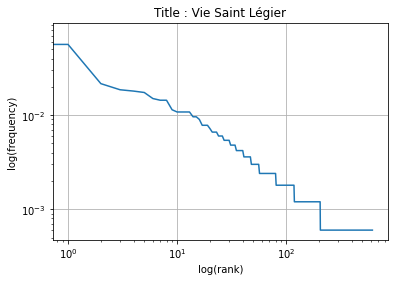

Counter({',': 519, '.': 178, 'la': 108, 'en': 96, 'li': 83, 'e': 81, 'il': 77, 'ne': 75, "l'": 68, 'de': 67, 'a': 62, 'que': 61, 'le': 56, 'est': 54, 'si': 49, "n'": 44, 'par': 43, "s'": 40, 'an': 40, 'lur': 37, 'Deu': 37, 'ki': 36, '«': 35, '»': 35, 'ad': 34, 'pur': 34, '!': 33, 'i': 32, 'sun': 30, 'cum': 26, 'grant': 26, ':': 26, 'ço': 26, 'et': 25, 'tut': 25, 'Alexis': 25, 'dist': 24, 'cors': 23, 'mais': 20, 'volt': 20, 'fut': 19, 'pedre': 19, 'nel': 19, 'saint': 19, 'Rome': 18, "d'": 17, 'filz': 17, 'del': 16, 'sa': 15, 'Deus': 15, 'tant': 15, 'nus': 15, 'se': 15, 'ai': 15, 'vint': 14, 'lui': 14, 'mult': 14, 'dunt': 13, 'as': 13, 'ses': 13, 'or': 13, 'terre': 13, 'estra': 13, 'al': 12, 'citét': 12, 'E': 12, 'unt': 12, 'cel': 12, 'sum': 12, "m'": 12, 'les': 12, "qu'": 12, 'Ço': 12, 'ert': 11, 'at': 11, 'un': 11, 'Quant': 11, 'plus': 11, 'jo': 11, 'el': 11, 'sil': 11, 'hom': 10, 'out': 10, 'tun': 10, 'fait': 10, "t'": 10, 'tei': 10, 'tuit': 10, 'mercit': 10, 'me': 10, 'quer': 9, 'bie

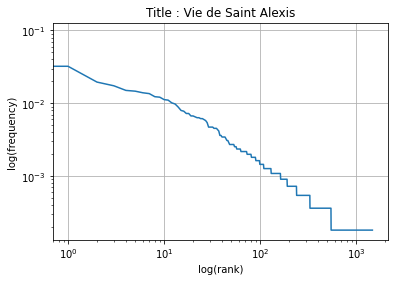

Counter({',': 2123, '.': 1491, 'e': 757, 'en': 651, 'li': 637, ':': 566, 'de': 479, ';': 468, 'ad': 437, 'est': 435, "l'": 429, 'le': 365, '!': 358, '»': 358, 'la': 357, '«': 357, 'i': 348, 'ne': 326, 'a': 316, 'E': 285, 'les': 263, 'que': 218, 'Li': 217, 'il': 202, 'sun': 197, "n'": 192, 'si': 190, 'Rollant': 186, 'vos': 183, 'ki': 165, 'De': 155, "d'": 153, 'un': 152, 'sunt': 152, 'grant': 146, "s'": 139, 'mult': 134, 'par': 132, 'reis': 128, 'se': 115, 'sa': 110, 'Carles': 109, 'Si': 105, 'unt': 105, "qu'": 102, 'Franceis': 98, 'En': 97, 'ses': 94, 'mort': 91, 'lur': 87, 'dist': 85, 'France': 84, 'quens': 84, 'al': 81, 'Ço': 79, 'Que': 78, 'or': 77, 'Ne': 76, 'des': 76, 'Par': 76, 'A': 75, 'ben': 74, 'jo': 72, 'as': 70, 'plus': 69, 'fait': 69, 'Oliver': 69, 'cors': 69, 'La': 66, 'emperere': 65, 'lui': 64, 'el': 64, 'Dist': 63, "L'": 63, 'tere': 61, 'bataille': 61, 'ço': 61, 'Deus': 61, 'Guenes': 61, 'fut': 60, 'ert': 60, 'altre': 60, 'rei': 59, '?': 59, 'me': 56, 'paien': 56, 'pur':

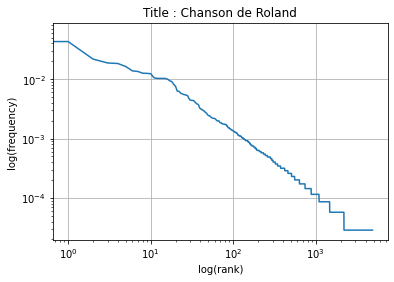

Counter({'.': 303, ',': 302, 'et': 202, 'de': 191, 'est': 177, 'la': 169, 'ele': 126, 'ki': 98, 'en': 97, 'a': 92, 'si': 89, 'que': 78, 'ad': 67, 'e': 63, 'hom': 57, '-': 57, 'le': 56, ';': 53, 'ne': 52, 'Ele': 52, 'les': 42, "l'": 33, 'une': 33, 'piere': 31, 'cume': 28, 'od': 28, 'il': 27, 'li': 24, 'u': 24, 'pur': 22, "n'": 21, 'del': 21, 'ewe': 21, 'par': 20, 'ceo': 20, 'bone': 19, 'sa': 19, 'vient': 18, 'dunet': 18, 'quant': 18, 'portet': 17, 'mult': 17, 'fait': 17, 'nule': 16, 'hume': 16, 'femme': 16, 'al': 15, 'valt': 15, 'plus': 15, 'bien': 14, 'deit': 14, 'se': 14, 'Iceste': 14, 'kar': 14, ':': 14, 'trovet': 13, 'colur': 13, 'maniere': 13, 'sunt': 11, 'mie': 11, 'ja': 11, 'neire': 11, 'altre': 11, 'Mais': 11, 'sun': 11, 'La': 11, 'culur': 11, 'mais': 10, 'ait': 10, 'grant': 10, 'estre': 10, 'el': 10, 'num': 10, 'dient': 10, 'ruge': 10, 'entre': 10, 'un': 9, 'des': 9, 'manieres': 9, 'i': 9, 'Indie': 9, 'pot': 9, 'sur': 9, 'or': 9, 'cele': 9, 'tutes': 9, 'oilz': 9, 'celui': 9, 'm

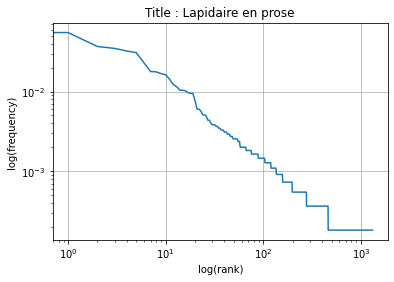

Counter({',': 3220, '.': 1406, 'et': 959, 'Et': 945, 'il': 819, 'a': 811, 'ne': 763, 'li': 718, 'la': 680, ';': 634, 'de': 618, 'que': 582, 'an': 578, 'Que': 546, 'vos': 538, 'le': 502, "l'": 463, 'en': 390, "n'": 358, 'qui': 355, "s'": 352, 'si': 343, 'se': 341, 'Si': 283, 'je': 278, "qu'": 275, 'est': 272, "Qu'": 261, 'mout': 256, 'Mes': 256, 'ele': 254, 'ce': 252, 'i': 250, 'Ne': 218, 'Qui': 216, 'les': 215, 'De': 213, '-': 206, ':': 203, "m'": 187, 'grant': 186, 'me': 185, 'son': 177, 'bien': 175, 'fet': 174, 'par': 166, 'lui': 166, 'por': 166, 'plus': 162, 'sa': 161, 'Se': 151, '«': 145, '»': 145, 'dame': 142, '!': 138, 'tant': 136, 'ot': 134, "S'": 131, 'Li': 129, '?': 129, 'Por': 124, 'fu': 120, 'A': 119, 'mes': 119, 'Yvains': 118, 'ja': 114, "d'": 113, 'La': 112, 'au': 110, 'Tant': 109, 'cil': 105, 'tot': 100, 'dit': 100, 'ou': 99, 'moi': 96, 'del': 96, "N'": 95, 'rien': 90, 'ses': 90, 'nos': 89, 'toz': 89, 'onques': 89, 'lor': 88, 'messire': 86, 'avoit': 85, 'une': 85, 'pas': 

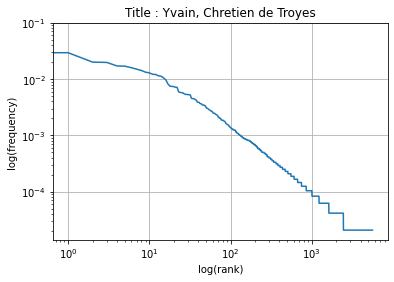

Counter({',': 2186, 'et': 1926, 'il': 1528, '.': 1114, 'que': 930, 'de': 915, 'li': 884, 'a': 876, 'en': 826, 'la': 731, 'si': 699, 'le': 586, 'ne': 547, 'qui': 543, "qu'": 511, 'vos': 455, 'ce': 386, "l'": 348, 'se': 336, 'est': 310, 'je': 299, 'Et': 289, 'les': 264, 'por': 248, "s'": 239, 'fet': 238, 'quant': 238, "n'": 235, 'car': 223, 'ou': 201, 'par': 193, '«': 190, 'son': 190, '»': 188, 'grant': 185, 'i': 184, 'bien': 182, 'tu': 178, ':': 177, 'fu': 177, 'cil': 173, 'avoit': 172, 'mes': 169, 'com': 167, 'dist': 167, '-': 165, 'tant': 165, 'Si': 155, 'dou': 150, 'une': 149, 'Lancelot': 146, 'mout': 145, 'estoit': 144, 'ceste': 141, 'plus': 137, 'ot': 133, 'lor': 126, 'au': 124, 'ele': 119, "d'": 116, 'me': 114, 'Galaad': 114, 'devant': 110, 'lui': 107, 'rois': 105, 'autre': 105, 'Quant': 104, '.i.': 100, 'laienz': 99, 'chevaliers': 99, 'nos': 98, 'Nostre': 98, 'Sire': 97, 'toz': 96, 'chevalier': 96, 'sa': 96, 'come': 92, 'des': 91, 'lors': 88, 'puis': 87, '.´': 84, 'estre': 79, 'c

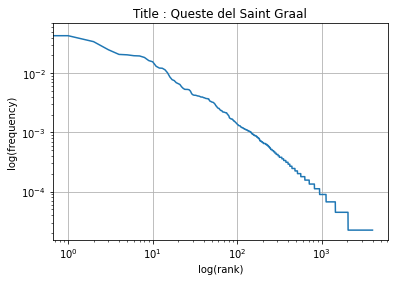

Counter({',': 860, 'et': 457, '.': 328, 'le': 248, 'si': 233, 'en': 213, 'de': 209, 'li': 204, 'a': 170, 'que': 167, 'ne': 162, 'vos': 154, 'il': 152, ';': 152, 'se': 122, "l'": 115, "qu'": 112, "s'": 109, 'je': 100, 'Aucassins': 96, 'fait': 91, 'ele': 91, 'les': 84, '-': 84, ':': 66, 'un': 64, 'Nicolete': 64, 'la': 63, 'tant': 61, 'fu': 61, 'qui': 60, '!': 60, 'por': 59, 'une': 57, 'me': 56, "n'": 55, 'par': 55, 'estoit': 52, 'amie': 50, 'u': 49, '«': 48, '»': 48, 'i': 48, '?': 44, 'son': 43, 'au': 42, 'ET': 41, 'est': 41, 'Et': 41, 'OR': 40, 'bien': 39, 'avoit': 38, 'plus': 35, 'mie': 34, 'mais': 33, 'ses': 32, "m'": 32, 'ja': 32, "d'": 31, 'molt': 30, 'vint': 30, 'Dix': 29, 'vous': 29, 'sor': 29, 'biax': 28, 'car': 27, 'des': 26, 'quant': 26, 'douce': 25, 'lui': 24, 'mi': 24, 'or': 24, 'on': 24, 'Aucassin': 23, 'Sire': 23, 'Il': 22, 'cil': 22, 'el': 22, 'ce': 22, 'oï': 22, 'ci': 22, "j'": 21, 'fist': 20, 'DIENT': 20, 'con': 20, 'SE': 20, 'CANTE': 20, 'dont': 20, 'ai': 20, 'grant': 1

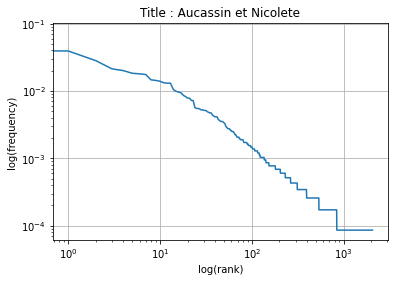

Counter({',': 2493, '.': 1594, 'en': 649, 'a': 591, 'la': 491, ':': 416, 'li': 414, 'de': 404, 'le': 378, 'il': 360, "l'": 359, 'ne': 326, 'et': 273, "s'": 248, 'Tristran': 239, 'que': 238, ';': 223, 'Et': 221, 'Li': 217, "n'": 214, 'vos': 201, '»': 196, '«': 193, '!': 192, 'est': 187, 'rois': 183, 'qui': 180, 'par': 170, 'un': 161, 'si': 158, 'Que': 151, 'roi': 146, 'Qui': 136, 'i': 134, "m'": 134, 'son': 132, 'Ne': 132, 'fait': 129, 'je': 126, 'les': 123, 'fu': 122, 'A': 122, 'se': 121, 'De': 114, 'grant': 112, 'bien': 111, "qu'": 110, 'me': 109, 'por': 104, 'moi': 102, 'sa': 101, '-': 99, 'mot': 97, 'Par': 95, "d'": 92, 'lui': 92, 'Se': 90, 'lor': 90, 'nos': 89, 'roïne': 89, '?': 88, 'ce': 86, 'En': 86, 'au': 86, 'La': 85, 'o': 83, 'du': 81, 'Yseut': 81, 'sont': 77, 'Sire': 75, 'ert': 74, 'el': 72, 'Por': 70, 'Mot': 70, 'Dex': 69, 'ont': 69, "N'": 66, 'pas': 66, 'ot': 65, 'ai': 65, 'or': 63, "Qu'": 63, 'out': 62, 'Or': 60, 'plus': 59, 'Qant': 57, 'Deu': 56, 'mon': 56, 'ou': 56, 'dit

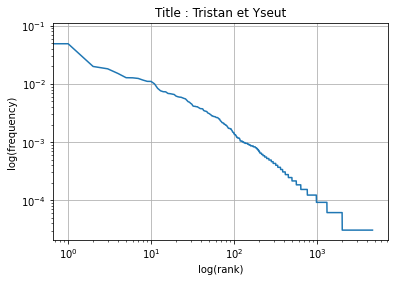

Counter({'é': 717, ',': 694, '.': 658, 'de': 379, 'en': 277, 'li': 252, 'á': 247, 'la': 209, 'que': 208, 'le': 205, "l'": 198, 'Deu': 184, ':': 168, 'É': 164, '«': 154, '»': 153, 'ki': 141, 'les': 122, 'il': 119, 'fud': 118, 'si': 114, 'Saül': 110, 'Samuel': 109, 'ne': 108, 'par': 91, 'est': 91, 'fiz': 85, 'çó': 81, 'Israel': 80, 'pur': 77, 'lur': 71, 'sur': 71, 'sun': 67, 'al': 62, 'out': 60, 'sa': 59, 'se': 59, 'nus': 58, 'kar': 57, 'vus': 54, 'a': 53, 'dist': 51, 'od': 50, '?': 50, 'devant': 50, 'cume': 49, 'arche': 47, "s'": 47, 'as': 46, 'un': 46, 'ces': 46, 'pople': 45, 'des': 44, 'terre': 42, 'ad': 41, 'ses': 41, 'rei': 41, 'furent': 40, 'del': 39, 'mais': 37, 'í': 37, ';': 36, 'Deus': 36, 'te': 35, 'fait': 35, 'nostre': 34, 'poples': 34, 'ost': 34, 'Li': 33, "n'": 33, 'jur': 33, 'encuntre': 33, 'Respundi': 33, 'vint': 32, 'fist': 32, 'mei': 32, 'pas': 32, 'ú': 30, 'cest': 30, "qu'": 30, '!': 29, 'Mais': 28, 'David': 28, 'tu': 27, 'quant': 26, 'Hely': 26, 'Seignur': 26, 'lui': 2

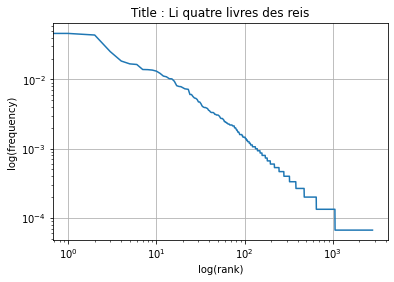

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

for i, row in df.iterrows():
  # print(Counter(row["tokens"]))
  arr = row["tokens"]
  # arr = reduce(add, row["tokens"])
  # We use reduce to concatenate all the lists in arr, but we don't use "set"
  # so that we can count occurencies with a Counter object
  c = Counter(arr)
  print(c)
  # Formating the counter object to a proper dataset
  d = pd.DataFrame(c, index=['occurrences']).transpose().reset_index()
  d.columns=['word', 'occurences']
  # Computing frequencies instead of occurences
  nb_total = d.occurences.sum()
  d['freq'] = d.occurences.apply(lambda x: x/nb_total)
  # Sorting by frequency, most frequent word at the top of the df
  d = d.sort_values('freq', ascending=False)
  plt.figure()
  plt.grid()
  plt.xscale('log')  # Using log scale
  plt.yscale('log')  # Using log scale
  plt.xlabel('log(rank)')
  plt.ylabel('log(frequency)')
  plt.title("Title : {0}".format(row["title"]))
  x = list(range(d.shape[0]))
  plt.plot(x, d.freq)
  plt.show()

___
# <strong><font color="teal">Explore the Dataset through Embeddings</font></strong>

#### 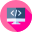 **TODO:** Find the closests Text Pairs

In this part you have to train word embeddings to identify the pairs of most similar texts.

This means, you want to obtain something such as this:
```
False | Title1 (prose) ==> Title2 (verse) : 0.00039143990167234133
... (and so on)
```

Where `False` indicates that the most similar text for Title1 is Title2 and is not made of the same form. The float number indicates the cosine distance.

In [ ]:
df

,title,filename,form,text,sentlength,tokens
0,Vie Saint Légier,StLegier,verse,Dominedeu devemps lauder et a sus sancz honor ...,8.809524,"[Dominedeu, devemps, lauder, et, a, sus, sancz..."
1,Vie de Saint Alexis,StAlexis,verse,Bons fut li secles al tens ancïenur\nquer feit...,9.797872,"[Bons, fut, li, secles, al, tens, ancïenur, qu..."
2,Chanson de Roland,Roland,verse,"Carles li reis , nostre emperere magnes , Set ...",8.946787,"[Carles, li, reis, ,, nostre, emperere, magnes..."
3,Lapidaire en prose,Lapidaire,prose,"Hom trovet lisant que Evax , li reis de Arabie...",10.484733,"[Hom, trovet, lisant, que, Evax, ,, li, reis, ..."
4,"Yvain, Chretien de Troyes",TroyesYvain,verse,"Artus li boens rois de Bretaingne , La cui pro...",12.361856,"[Artus, li, boens, rois, de, Bretaingne, ,, La..."
5,Queste del Saint Graal,Graal,prose,et mes sires Gauvains lor demande coment il l'...,14.359345,"[et, mes, sires, Gauvains, lor, demande, comen..."
6,Aucassin et Nicolete,Aucassin,"verse, prose",C' EST D' AUCASIN ET DE NICOLETE\nQui vauroit ...,11.212909,"[C', EST, D', AUCASIN, ET, DE, NICOLETE, Qui, ..."
7,Tristan et Yseut,BeroulTristan,verse,"Com ele aprisme son ami , Oiez com el l' a dev...",9.847734,"[Com, ele, aprisme, son, ami, ,, Oiez, com, el..."
8,Li quatre livres des reis,QuatreLivresReis,prose,Li primiers livres des Reis .\nUns bérs fu ja ...,9.960239,"[Li, primiers, livres, des, Reis, ., Uns, bérs..."


In [ ]:
from gensim.models import Word2Vec
from multiprocessing import cpu_count

cpu = cpu_count()
print('The virtual instance has {} cpus, that will be used to train the word2vec model'.format(cpu))

w2v = Word2Vec(df["tokens"], size=100, window=5, min_count=3, workers=cpu)
w2v.train(df["tokens"], total_examples=len(df["tokens"]), epochs=5)

The virtual instance has 2 cpus, that will be used to train the word2vec model


(324097, 997160)

In [ ]:
# w2v.wv["Yvain"]
# wv.similarity(w1, w2)
w2v.wv.most_similar("Yvain", topn=5)

[('oïr', 0.9992414712905884),
 ('Galaad', 0.9990622997283936),
 ('apele', 0.9990214705467224),
 ('barons', 0.998977780342102),
 ('porent', 0.9988880157470703)]

In [ ]:
text_vecs = []
for i, row in df.iterrows():
  vecs = []
  for s in row["tokens"]:
    for t in s:
      try: vecs.append(w2v.wv[t].tolist())
      except: vecs.append(np.zeros(100).tolist())
  vecs = np.array(vecs)
  text_vecs.append( np.mean(vecs, axis=0).tolist() )

df["meanvec"] = text_vecs
df

,title,filename,form,text,sentlength,tokens,meanvec
0,Vie Saint Légier,StLegier,verse,Dominedeu devemps lauder et a sus sancz honor ...,8.809524,"[Dominedeu, devemps, lauder, et, a, sus, sancz...","[-0.24646318337884743, 0.08527461066022225, 0...."
1,Vie de Saint Alexis,StAlexis,verse,Bons fut li secles al tens ancïenur\nquer feit...,9.797872,"[Bons, fut, li, secles, al, tens, ancïenur, qu...","[-0.27087127878827777, 0.09028368692006494, 0...."
2,Chanson de Roland,Roland,verse,"Carles li reis , nostre emperere magnes , Set ...",8.946787,"[Carles, li, reis, ,, nostre, emperere, magnes...","[-0.27624085040917545, 0.08191429502895843, 0...."
3,Lapidaire en prose,Lapidaire,prose,"Hom trovet lisant que Evax , li reis de Arabie...",10.484733,"[Hom, trovet, lisant, que, Evax, ,, li, reis, ...","[-0.2938345788257878, 0.09680145447978242, 0.0..."
4,"Yvain, Chretien de Troyes",TroyesYvain,verse,"Artus li boens rois de Bretaingne , La cui pro...",12.361856,"[Artus, li, boens, rois, de, Bretaingne, ,, La...","[-0.27992871483149506, 0.09163046014033023, 0...."
5,Queste del Saint Graal,Graal,prose,et mes sires Gauvains lor demande coment il l'...,14.359345,"[et, mes, sires, Gauvains, lor, demande, comen...","[-0.2796164140362891, 0.09312672708761562, 0.0..."
6,Aucassin et Nicolete,Aucassin,"verse, prose",C' EST D' AUCASIN ET DE NICOLETE\nQui vauroit ...,11.212909,"[C', EST, D', AUCASIN, ET, DE, NICOLETE, Qui, ...","[-0.2857253873959818, 0.09411901410105779, 0.0..."
7,Tristan et Yseut,BeroulTristan,verse,"Com ele aprisme son ami , Oiez com el l' a dev...",9.847734,"[Com, ele, aprisme, son, ami, ,, Oiez, com, el...","[-0.2789823026262245, 0.08627263284795983, 0.0..."
8,Li quatre livres des reis,QuatreLivresReis,prose,Li primiers livres des Reis .\nUns bérs fu ja ...,9.960239,"[Li, primiers, livres, des, Reis, ., Uns, bérs...","[-0.2857652931785235, 0.09491335956069967, 0.0..."


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances
dists = cosine_distances( np.array( df["meanvec"].to_list() ) )
dists = dists.tolist()

for i, dist in enumerate(dists): dists[i][i] = 99999
closests = np.argmin(np.array(dists), axis=0)

for i, row in df.iterrows():
  msg = "%s | %s (%s) ==> %s (%s) : %s" % (row["form"] == df.iloc[closests[i]]["form"], row["title"], row["form"], df.iloc[closests[i]]["title"], df.iloc[closests[i]]["form"], dists[i][closests[i]] )
  print(msg )

True | Vie Saint Légier (verse) ==> Yvain, Chretien de Troyes (verse) : 0.00030341855026638775
False | Vie de Saint Alexis (verse) ==> Queste del Saint Graal (prose) : 1.679843002144743e-05
True | Chanson de Roland (verse) ==> Tristan et Yseut (verse) : 7.907919868788138e-05
False | Lapidaire en prose (prose) ==> Vie de Saint Alexis (verse) : 0.00015847347575381754
False | Yvain, Chretien de Troyes (verse) ==> Aucassin et Nicolete (verse, prose) : 7.903258481878339e-06
False | Queste del Saint Graal (prose) ==> Vie de Saint Alexis (verse) : 1.679843002144743e-05
False | Aucassin et Nicolete (verse, prose) ==> Yvain, Chretien de Troyes (verse) : 7.903258481878339e-06
True | Tristan et Yseut (verse) ==> Chanson de Roland (verse) : 7.907919868788138e-05
True | Li quatre livres des reis (prose) ==> Lapidaire en prose (prose) : 0.00018913057214697826


#### 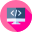 **TODO:** Answer this question

What kind of pattern related to the texts' form do you see? Are prose texts necessarily closer to other prose texts?

In [ ]:
# Print your answer

___
# <strong><font color="teal">Explore the Dataset through Simple Classifiers</font></strong>

#### 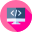 **TODO:** Leave One Out Classification

In this section you need to consider very simple classifiers in a Leave One Out approach. This means you need to train an Support Vector Classifier on ALL the texts except two (one text + the "Aucassin" text as it is both made of prose and verse).

You will actually try to classify each text by its form.

Then you need to print the differences between the predicted form and the real form.

Let's ignore `Aucassin et Nicolete` because it is both made of verse and prose.

In [1]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

def trainAllPredictOne(target):
  traindf = df[(df["filename"] != target) & (df["filename"] != 'Aucassin')]
  testarr = np.array( [df[ df["filename"] == target ].iloc[0]["meanvec"]] )
  testlabel = df[ df["filename"] == target ].iloc[0]

  # lsvm = LinearSVC()
  clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
  clf.fit(traindf["meanvec"].tolist(), traindf["form"])
  res = clf.predict(testarr)[0]
  return (res == testlabel["form"], res, testlabel["form"], testlabel["filename"], )

for target in df['filename']:
  print(trainAllPredictOne(target))


NameError: name 'df' is not defined

#### 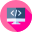 **TODO:** Answer this question

What differences do you see between this results' pattern and the previous one (from cosine distance)?

In [ ]:
# Print your answer

___
# <strong><font color="teal">Explore the Dataset through Encoder-Decoder</font></strong>

In this last section, you will have to adapt the encoder-decoder to the same task:

**encode from one text and decode to the other one**!

To help you focus on adapting the approach, some parts are already done. The following snippets consider you actually used Pandas in the previous parts.

In [ ]:
! pip install datasets sacrebleu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
from datasets import load_dataset, DatasetDict
import datasets
from tqdm import tqdm
import pandas as pd
from termcolor import colored
from collections import Counter

from sacrebleu.metrics import BLEU

In [ ]:
UNK_IDX, PAD_IDX, SOS_IDX, EOS_IDX = 0, 1, 2, 3
special_symbols = ['<unk>', '<pad>', '<sos>', '<eos>']

In [ ]:
# stoi string to index
# itos index to string

# you only need one main vocab
VOC = {'stoi': {}, 'counts': {}, 'nbwords': 0}

def parse_entry(tokens):
  for t in tokens:
    if t not in VOC['stoi']:
      VOC['stoi'][t] = VOC['nbwords']
      VOC['counts'][t] = 1
      VOC['nbwords'] += 1
    else:
      VOC['counts'][t] = VOC['counts'][t] + 1

for t in special_symbols:
  VOC['stoi'][t] = VOC['nbwords']
  VOC['counts'][t] = 1
  VOC['nbwords'] += 1

In [ ]:
for i, row in tqdm(df.iterrows()):
  parse_entry(row["tokens"])

VOC['itos'] = { v:k for k,v in VOC['stoi'].items()}

9it [00:00, 35.92it/s]


In [ ]:
def prepa(sents):
  res =  [ [SOS_IDX] + [ VOC['stoi'][t] if t in VOC['stoi'] else UNK_IDX for t in s.split(" ") ] + [EOS_IDX] for s in sents ]
  return res
df['train'] = df['text'].apply(lambda e: prepa(e.split("\n")))

In [ ]:
df

,title,filename,form,text,sentlength,tokens,meanvec,train
0,Vie Saint Légier,StLegier,verse,Dominedeu devemps lauder et a sus sancz honor ...,8.809524,"[Dominedeu, devemps, lauder, et, a, sus, sancz...","[-0.24646318337884743, 0.08527461066022225, 0....","[[2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 3], [2,..."
1,Vie de Saint Alexis,StAlexis,verse,Bons fut li secles al tens ancïenur\nquer feit...,9.797872,"[Bons, fut, li, secles, al, tens, ancïenur, qu...","[-0.27087127878827777, 0.09028368692006494, 0....","[[2, 623, 624, 51, 625, 67, 626, 627, 3], [2, ..."
2,Chanson de Roland,Roland,verse,"Carles li reis , nostre emperere magnes , Set ...",8.946787,"[Carles, li, reis, ,, nostre, emperere, magnes...","[-0.27624085040917545, 0.08191429502895843, 0....","[[2, 1942, 51, 95, 55, 1073, 692, 1943, 55, 16..."
3,Lapidaire en prose,Lapidaire,prose,"Hom trovet lisant que Evax , li reis de Arabie...",10.484733,"[Hom, trovet, lisant, que, Evax, ,, li, reis, ...","[-0.2938345788257878, 0.09680145447978242, 0.0...","[[2, 2536, 6110, 6111, 50, 6112, 55, 51, 95, 3..."
4,"Yvain, Chretien de Troyes",TroyesYvain,verse,"Artus li boens rois de Bretaingne , La cui pro...",12.361856,"[Artus, li, boens, rois, de, Bretaingne, ,, La...","[-0.27992871483149506, 0.09163046014033023, 0....","[[2, 6940, 51, 1215, 6941, 34, 6942, 55, 509, ..."
5,Queste del Saint Graal,Graal,prose,et mes sires Gauvains lor demande coment il l'...,14.359345,"[et, mes, sires, Gauvains, lor, demande, comen...","[-0.2796164140362891, 0.09312672708761562, 0.0...","[[2, 7, 1540, 8371, 7033, 372, 9033, 11464, 43..."
6,Aucassin et Nicolete,Aucassin,"verse, prose",C' EST D' AUCASIN ET DE NICOLETE\nQui vauroit ...,11.212909,"[C', EST, D', AUCASIN, ET, DE, NICOLETE, Qui, ...","[-0.2857253873959818, 0.09411901410105779, 0.0...","[[2, 7348, 13548, 893, 13549, 13550, 13551, 13..."
7,Tristan et Yseut,BeroulTristan,verse,"Com ele aprisme son ami , Oiez com el l' a dev...",9.847734,"[Com, ele, aprisme, son, ami, ,, Oiez, com, el...","[-0.2789823026262245, 0.08627263284795983, 0.0...","[[2, 8177, 1057, 14560, 140, 1074, 55, 5076, 3..."
8,Li quatre livres des reis,QuatreLivresReis,prose,Li primiers livres des Reis .\nUns bérs fu ja ...,9.960239,"[Li, primiers, livres, des, Reis, ., Uns, bérs...","[-0.2857652931785235, 0.09491335956069967, 0.0...","[[2, 452, 16795, 2846, 512, 248, 37, 3], [2, 3..."


In [ ]:
sentences = []
for i, row in df.iterrows():
  for t, idx in zip(row["text"].split("\n"), row["train"]):
    d = {"title": row["title"], "filename": row["filename"], "form": row["form"], "text": t, "indices": idx}
    sentences.append(d)
df_bysentence = pd.DataFrame.from_records(sentences)
df_bysentence

,title,filename,form,text,indices
0,Vie Saint Légier,StLegier,verse,Dominedeu devemps lauder et a sus sancz honor ...,"[2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 3]"
1,Vie Saint Légier,StLegier,verse,in su' amor cantomps del ·sanz quae por lui au...,"[2, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24..."
2,Vie Saint Légier,StLegier,verse,et or es temps,"[2, 7, 26, 27, 28, 3]"
3,Vie Saint Légier,StLegier,verse,et si est biens quae nos cantumps de sant Leth...,"[2, 7, 29, 30, 31, 20, 32, 33, 34, 35, 36, 37, 3]"
4,Vie Saint Légier,StLegier,verse,Primos didrai vos dels honors quae il awret ab...,"[2, 38, 39, 40, 41, 42, 20, 43, 44, 45, 46, 47..."
...,...,...,...,...,...
18013,Li quatre livres des reis,QuatreLivresReis,prose,« Vien !,"[2, 306, 15583, 710, 3]"
18014,Li quatre livres des reis,QuatreLivresReis,prose,"Vien plus pres de mei ,","[2, 15583, 806, 202, 34, 828, 55, 3]"
18015,Li quatre livres des reis,QuatreLivresReis,prose,é jó durrai tun cors á devorer a bestes é a oi...,"[2, 16797, 17158, 2131, 716, 524, 16847, 15658..."
18016,Li quatre livres des reis,QuatreLivresReis,prose,Respundi David :,"[2, 17218, 648, 77, 3]"


In [ ]:
maxlen = 10

In [ ]:
trainds = datasets.Dataset.from_pandas(df_bysentence)
trainds

Dataset({
    features: ['title', 'filename', 'form', 'text', 'indices'],
    num_rows: 18018
})

#### 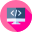 **TODO:** Adapt the indices

Instead of having a train, val, test split, adapt the indices to consider training on the verse texts, validating on the prose texts, and final test on the `Aucassin` text (which is both prose and verse).

In [ ]:
prose_indices = [i for i in range(len(trainds)) if trainds[i]["form"] == "prose"]
verse_indices = [i for i in range(len(trainds)) if trainds[i]["form"] == "verse"]
aucassin_indices = [i for i in range(len(trainds)) if trainds[i]["filename"] == "Aucassin"]

In [ ]:
print(len(prose_indices), len(verse_indices), len(aucassin_indices))

5147 11833 1038


In [ ]:
ds = DatasetDict()

ds['prose'] = trainds.select(prose_indices)
ds['verse'] = trainds.select(verse_indices)
ds['aucassin'] = trainds.select(aucassin_indices)

#### 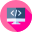 **TODO:** Adapt the dataset

Adapt the pytorch dataset according to the current data format

In [ ]:
from torch.utils.data import Dataset
import numpy as np

class OldFrenchDataset(Dataset):
    def __init__(self, data):
      self.data = data

    def __len__(self):
      return len(self.data)

    def __getitem__(self, idx):
      item = np.array(self.data[idx]["indices"])
      return item

#### 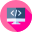 **TODO:** Create the dataloaders

Name them `prose_loader`, `verse_loader`, and `aucassin_loader`

In [ ]:
from torch.utils.data import DataLoader
prose_loader = DataLoader(OldFrenchDataset(ds['prose']), batch_size=1, shuffle=True, drop_last=True)
verse_loader   = DataLoader(OldFrenchDataset(ds['verse']), batch_size=1, shuffle=True, drop_last=True)
aucassin_loader   = DataLoader(OldFrenchDataset(ds['verse']), batch_size=1, shuffle=True, drop_last=True)

Now below is a bunch of already working code.

In [ ]:
if torch.cuda.is_available():
  device = 'cuda'
  print('DEVICE = ', colored(torch.cuda.get_device_name(0), "green" ) )
else:
  device = 'cpu'
  print('DEVICE = ', colored('CPU', "blue"))

DEVICE =  Tesla T4


In [ ]:
class EncoderRNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(EncoderRNN, self).__init__()
        # configurable hidden size
        self.hidden_size = hidden_size

        # we use an embedding layer
        self.embedding = nn.Embedding(input_size, hidden_size)
        # we define a GRU layer (Gated Recurrent Unit), a simpler version of recurrent layer and way simple than LSTM
        self.gru = nn.GRU(hidden_size, hidden_size)

    def forward(self, input, hidden):
      # move the input to the dedicated device (CPU or GPU)
      input = input.to(device)
      # apply the embedding layer
      embedded = self.embedding(input)
      # modify the output shape in order for it to work with a GRU (we use batches of one element)
      output = embedded.view(1, 1, -1)
      # apply the GRU layer
      output, hidden = self.gru(output, hidden)
      # return both the output, and the hidden vector
      return output, hidden

    def initHidden(self):
        """
        method used to customize the hidden vector initialization.
        here the vector is initialized as 0 with the correct shape and created directly on the correct device
        """
        return torch.zeros(1, 1, self.hidden_size, device=device)

In [ ]:
class DecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size):
        super(DecoderRNN, self).__init__()
        # configurable hidden size
        self.hidden_size = hidden_size

        # we use an embedding layer
        self.embedding = nn.Embedding(output_size, hidden_size)
        # we define a GRU layer (Gated Recurrent Unit), a simpler version of recurrent layer and way simple than LSTM
        self.gru = nn.GRU(hidden_size, hidden_size)
        self.out = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
      # move the input to the dedicated device (CPU or GPU)
        input = input.to(device)
        # apply the embedding layer and modify the output shape in order for it to work with a GRU (we use batches of one element)
        output = self.embedding(input).view(1, 1, -1)
        # apply a ReLU non linearization layer
        output = F.relu(output)
        # apply the GRU layer
        output, hidden = self.gru(output, hidden)
        # apply a softmax to get probabilities, on the first element of the output vector (batch is equal to one)
        output = self.softmax(self.out(output[0]))
        # return both the output probabilities and the hidden vector
        return output, hidden

    def initHidden(self):
        """
        method used to customize the hidden vector initialization.
        here the vector is initialized as 0 with the correct shape and created directly on the correct device
        """
        return torch.zeros(1, 1, self.hidden_size, device=device)

In [ ]:
import random
teacher_forcing_ratio = 0.5


def train(input_tensor, target_tensor, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion, max_length=maxlen):
    # put both encoder and decoder into trainning mode
    encoder.train()
    decoder.train()

    # use our custom initialization of hidden vector
    encoder_hidden = encoder.initHidden()

    # remove the gradient to prevent gradient accumulation
    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()

    # adapt the tensor sizes
    input_tensor = input_tensor.view(input_tensor.size(1), input_tensor.size(0)) #input_tensor.view(1,1,-1)
    target_tensor = target_tensor.view(target_tensor.size(1), target_tensor.size(0)) #target_tensor.view(1,1,-1)

    # keep the lengths in memory
    input_length = input_tensor.size(0)
    target_length = target_tensor.size(0)

    # prepare an empty output with the correct size and the correct device
    encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

    # init the loss to 0
    loss = 0

    # pass each token of the input_tensor to the encoder, then populate the output
    for ei in range(input_length):
      if ei >= maxlen: break
      encoder_output, encoder_hidden = encoder(input_tensor[ei], encoder_hidden)
      encoder_outputs[ei] = encoder_output[0, 0]

    # now we consider the decoder input, which starts only with the SOS token
    decoder_input = torch.tensor([[SOS_IDX]], device=device)

    # share the hidden vector from encoder to the decoder
    decoder_hidden = encoder_hidden

    # add a condition to teacher forcing
    use_teacher_forcing = True if random.random() < teacher_forcing_ratio else False

    if use_teacher_forcing:
        # Teacher forcing: Feed the target as the next input
        for di in range(target_length):
            decoder_output, decoder_hidden = decoder(
                decoder_input, decoder_hidden)
            # apply the NLL loss
            loss += criterion(decoder_output.to(device), target_tensor[di].to(device))
            decoder_input = target_tensor[di]  # Teacher forcing

    else:
      # Without teacher forcing: use its own predictions as the next input
      for di in range(target_length):
          decoder_output, decoder_hidden = decoder(
              decoder_input, decoder_hidden)
          topv, topi = decoder_output.topk(1)
          decoder_input = topi.squeeze().detach()  # detach from history as input
          # compute the loss
          loss += criterion(decoder_output, target_tensor[di].to(device))
          # stop the iteration if the EOS token is predicted
          if decoder_input.item() == EOS_IDX:
              break

    # do the back propagation
    loss.backward()

    # notify each optimizers
    encoder_optimizer.step()
    decoder_optimizer.step()

    # return the average loss
    return loss.item() / target_length

In [ ]:
def sentence2tensor(entry):
  """
  Function to transform an entry sentence into its corresponding indices as a tensor.
  Needs to indicate the language to select the correct part of the vocabulary
  """
  indices = [SOS_IDX] + [ VOC['stoi'][t] if t in VOC['stoi'] else 0 for t in entry ] + [EOS_IDX]
  print(indices)
  return torch.tensor(indices)

def evaluate(encoder, decoder, sentence, max_length=maxlen, input_tensor=None, target_tensor=None, criterion=None):
    """
    function to evaluate a translation of one sentence
    """
    # we evaluate, so we don't need gradients -> torch.no_grad()
    with torch.no_grad():

        if target_tensor is None: target_length = 0
        else: target_length = target_tensor.size(0)

        encoder_hidden = encoder.initHidden()

        # this condition adapts the function to either use a sentence as input, or a tensor
        if input_tensor is None:
          input_tensor = sentence2tensor(sentence)
          # adapts the decoding length, useful for validation or test
          decoding_length = max_length
        else:
          decoding_length = target_length

        input_length = input_tensor.size(0)

        encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

        # iterate through the input length
        for ei in range(input_length):
            if ei >= maxlen: break
            encoder_output, encoder_hidden = encoder(input_tensor[ei], encoder_hidden)
            encoder_outputs[ei] += encoder_output[0, 0]

        decoder_input = torch.tensor([[SOS_IDX]], device=device)  # SOS

        decoder_hidden = encoder_hidden

        decoded_words = []

        # init the loss (the loss is important is the cirterion is given - i.e. validation phase)
        loss = 0

        # iterate through decoding values, feeding the output for the next token until the condition or maximum lenght is reached
        for di in range(decoding_length):
            decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
            topv, topi = decoder_output.data.topk(1)
            if topi.item() == EOS_IDX:
                decoded_words.append('<EOS>')
                break
            else:
                decoded_words.append(VOC['itos'][topi.item()])

            decoder_input = topi.squeeze().detach()

            if target_tensor != None and criterion is not None:
              loss += criterion(decoder_output.to(device), target_tensor[di].unsqueeze(0).to(device))
              if decoder_input.item() == EOS_IDX:
                break

        return decoded_words, loss

In [ ]:
def inference(target, loader, encoder, decoder, criterion, limit=0):
  """
  fucntion to apply the inference logic over multiple translation and return a score
  used for validation
  """
  encoder.eval()
  decoder.eval()
  loss_it, glue_it = list(), list()
  preds, trues = list(), list()

  total = loader.__len__()
  if limit > 0: total = limit

  # iterate through the loader, can be a validation or test loader
  for it, batch in tqdm(enumerate(loader), desc="%s:" % (target), total=total):

    if limit > 0 and it >= limit: break

    input_tensor = batch.squeeze()
    target_tensor = batch.squeeze()

    # dummy sentence because this function is used for validation, not on-demand test
    mock_sentence = "dummy sentence not used"

    # compute entry and target sentences as "real text"
    entry = [VOC['itos'][t] for t in input_tensor.tolist()]
    entry = ' '.join( [e for e in entry if e not in ['<pad>', '<sos>', '<eos>', '<EOS>']] )
    true =  [VOC['itos'][t] for t in target_tensor.tolist()]
    true = ' '.join( [r for r in true if r not in ['<pad>', '<sos>', '<eos>', '<EOS>']] )
    trues.append([true])

    pred, loss = evaluate(encoder, decoder, mock_sentence, input_tensor=input_tensor, target_tensor=target_tensor, criterion=criterion)
    pred = ' '.join( [ h for h in pred if h not in ['<pad>', '<sos>', '<eos>', '<EOS>'] ] )
    preds.append(pred)
    if criterion is not None:
      try:
        loss_it.append(loss.item())
      except: pass
    else: loss_it.append(loss)

  bleu = BLEU()
  bleu_score = bleu.corpus_score(preds, trues)

  loss_it_avg = sum(loss_it)/len(loss_it)

  print("%s : (%s %s) (%s %s)" % ( colored(target, 'blue'), colored('loss', 'cyan'), loss_it_avg, colored('blue', 'cyan'), bleu_score ))

  return trues, preds, loss_it_avg, loss_it, bleu_score

In [ ]:
import torch.optim as optim

def run_epochs(encoder, decoder, max_epochs, learning_rate=0.01, limit=0, train_loader=verse_loader, val_loader=prose_loader):

    # define the optimizer for both encoder and decoder separately.
    # You can change it later on
    encoder_optimizer = optim.SGD(encoder.parameters(), lr=learning_rate)
    decoder_optimizer = optim.SGD(decoder.parameters(), lr=learning_rate)
    criterion = nn.NLLLoss()

    epoch_losses = []
    val_epoch_losses = []

    for ep in range(max_epochs):

      # TRAINING
      it_losses = []

      total = train_loader.__len__()
      # allow to limit the number of random samples per epoch
      if limit > 0: total = limit

      for iter, batch in tqdm(enumerate(train_loader), desc="Epoch %s:" % (ep), total=total):
          # trigger the limit if it is set
          if limit > 0 and iter >= limit: break

          input_tensor = batch
          target_tensor = batch

          loss = train(input_tensor, target_tensor, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion)
          it_losses.append(loss)

      epoch_loss = sum(it_losses)/len(it_losses)
      epoch_losses.append(epoch_loss)
      print("Epoch %s : %s : (%s %s) " % (colored(str(ep), 'blue'), colored('Training', 'blue'), colored('loss', 'cyan'), epoch_loss  ))


      # VALIDATION
      trues, preds, val_loss_it_avg, val_loss_it, bleu_score = inference("validation", val_loader, encoder, decoder, criterion, limit=limit)
      val_epoch_losses.append(val_loss_it_avg)


    return epoch_losses, val_epoch_losses

In [ ]:
# the hidden size is up to you, higher value yields longer training time
hidden_size = 512
epochs = 10

# instanciate the encoder
encoder1 = EncoderRNN(VOC['nbwords'], hidden_size).to(device)
# instanciate the decoder
decoder1 = DecoderRNN(hidden_size, VOC['nbwords']).to(device)

# run the epochs
loss_list, val_loss_list = run_epochs(encoder1, decoder1, epochs, learning_rate=0.01, limit=200)

Epoch 0:: 100%|██████████| 200/200 [00:07<00:00, 25.67it/s]


Epoch 0 : Training : (loss 5.739245825107097) 


validation:: 100%|██████████| 200/200 [00:01<00:00, 155.25it/s]


validation : (loss 22.92072093486786) (blue BLEU = 0.00 100.0/50.0/50.0/0.0 (BP = 1.000 ratio = 1.000 hyp_len = 3 ref_len = 3))


Epoch 1:: 100%|██████████| 200/200 [00:06<00:00, 30.55it/s]


Epoch 1 : Training : (loss 4.956356070833583) 


validation:: 100%|██████████| 200/200 [00:01<00:00, 133.54it/s]


validation : (loss 29.997921466827393) (blue BLEU = 0.00 100.0/25.0/25.0/0.0 (BP = 1.000 ratio = 1.000 hyp_len = 3 ref_len = 3))


Epoch 2:: 100%|██████████| 200/200 [00:06<00:00, 30.49it/s]


Epoch 2 : Training : (loss 4.590018986986091) 


validation:: 100%|██████████| 200/200 [00:03<00:00, 59.70it/s]


validation : (loss 42.96397614479065) (blue BLEU = 17.29 85.7/16.7/10.0/6.2 (BP = 1.000 ratio = 1.000 hyp_len = 7 ref_len = 7))


Epoch 3:: 100%|██████████| 200/200 [00:08<00:00, 23.52it/s]


Epoch 3 : Training : (loss 4.908200422581778) 


validation:: 100%|██████████| 200/200 [00:03<00:00, 58.12it/s]


validation : (loss 107.46453492164612) (blue BLEU = 5.20 61.5/4.2/2.3/1.2 (BP = 1.000 ratio = 1.000 hyp_len = 13 ref_len = 13))


Epoch 4:: 100%|██████████| 200/200 [00:06<00:00, 29.30it/s]


Epoch 4 : Training : (loss 4.815460936272965) 


validation:: 100%|██████████| 200/200 [00:02<00:00, 90.80it/s]


validation : (loss 60.39495435714721) (blue BLEU = 15.62 100.0/14.3/8.3/5.0 (BP = 1.000 ratio = 1.000 hyp_len = 8 ref_len = 8))


Epoch 5:: 100%|██████████| 200/200 [00:07<00:00, 27.67it/s]


Epoch 5 : Training : (loss 4.829212793350442) 


validation:: 100%|██████████| 200/200 [00:01<00:00, 122.87it/s]


validation : (loss 36.664360086917874) (blue BLEU = 37.99 100.0/33.3/25.0/25.0 (BP = 1.000 ratio = 1.000 hyp_len = 4 ref_len = 4))


Epoch 6:: 100%|██████████| 200/200 [00:07<00:00, 28.31it/s]


Epoch 6 : Training : (loss 4.712697062147637) 


validation:: 100%|██████████| 200/200 [00:01<00:00, 124.12it/s]


validation : (loss 35.6843896484375) (blue BLEU = 37.99 100.0/33.3/25.0/25.0 (BP = 1.000 ratio = 1.000 hyp_len = 4 ref_len = 4))


Epoch 7:: 100%|██████████| 200/200 [00:07<00:00, 26.23it/s]


Epoch 7 : Training : (loss 4.989340802377044) 


validation:: 100%|██████████| 200/200 [00:01<00:00, 146.05it/s]


validation : (loss 25.16669017314911) (blue BLEU = 0.00 100.0/50.0/50.0/0.0 (BP = 1.000 ratio = 1.000 hyp_len = 3 ref_len = 3))


Epoch 8:: 100%|██████████| 200/200 [00:07<00:00, 27.02it/s]


Epoch 8 : Training : (loss 4.729718186935102) 


validation:: 100%|██████████| 200/200 [00:02<00:00, 84.78it/s]


validation : (loss 68.17675333023071) (blue BLEU = 37.99 100.0/33.3/25.0/25.0 (BP = 1.000 ratio = 1.000 hyp_len = 4 ref_len = 4))


Epoch 9:: 100%|██████████| 200/200 [00:08<00:00, 24.36it/s]


Epoch 9 : Training : (loss 4.834259159803545) 


validation:: 100%|██████████| 200/200 [00:01<00:00, 130.34it/s]

validation : (loss 33.08799987792969) (blue BLEU = 0.00 100.0/25.0/25.0/0.0 (BP = 1.000 ratio = 1.000 hyp_len = 3 ref_len = 3))


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_loss(loss_list):
  '''
  this function creates a plot. a simple curve showing the different values at each steps.
  Here we use it to plot the loss so we named it plot_loss, but the same function with different titles could be used to plot accuracies
  or other metrics for instance.

  Args:
    loss_list (list of floats): list of numerical values
  '''
  plt.plot(range(len(loss_list)), loss_list)
  plt.xlabel('epochs')
  plt.ylabel('NLL')
  plt.title('lr: {}, optim_alg:{}'.format(0.01, 'SGD'))
  plt.show()

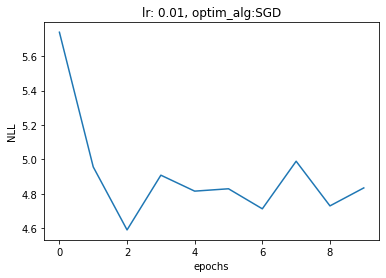

In [ ]:
# train loss
plot_loss(loss_list)

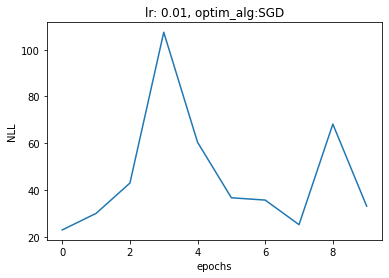

In [ ]:
# val loss
plot_loss(val_loss_list)

#### 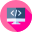 **TODO:** Run a final test on Aucassin

Make use of the aucassin loader that you created above.
You need to compare the results on Aucassin with a model trained on verse (and validated on prose) and a model trained on prose (and validated on verse).

In [ ]:
trues, preds, test_loss_it_avg, test_loss_it, bleu_score = inference("aucassin", aucassin_loader, encoder1, decoder1, None, limit=1000)
print(bleu_score)

aucassin:: 100%|██████████| 1000/1000 [00:07<00:00, 129.01it/s]


aucassin : (loss 0.0) (blue BLEU = 26.86 100.0/25.0/16.7/12.5 (BP = 1.000 ratio = 1.000 hyp_len = 5 ref_len = 5))
BLEU = 26.86 100.0/25.0/16.7/12.5 (BP = 1.000 ratio = 1.000 hyp_len = 5 ref_len = 5)


That's it! You finished the exam. 🎊 You actually went through a use-case scenario for data exploration in multiple ways. Of course, you can adjust it to your future tasks wether there are from public data for a laboratory of confidential data from a company.